# Applied AI Assignment 2

<a id="ch2"></a>
## Dataset
<hr/>

* This dataset contains house sale prices for King County, which includes Seattle. 
* It includes homes sold between May 2014 and May 2015.
* 21 columns. (features)
* 21597 rows.

***Feature Columns***
    
* **id:** Unique ID for each home sold
* **date:** Date of the home sale
* **price:** Price of each home sold
* **bedrooms:** Number of bedrooms
* **bathrooms:** Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* **sqft_living:** Square footage of the apartments interior living space
* **sqft_lot:** Square footage of the land space
* **floors:** Number of floors
* **waterfront:** - A dummy variable for whether the apartment was overlooking the waterfront or not
* **view:** An index from 0 to 4 of how good the view of the property was
* **condition:** - An index from 1 to 5 on the condition of the apartment,
* **grade:** An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* **sqft_above:** The square footage of the interior housing space that is above ground level
* **sqft_basement:** The square footage of the interior housing space that is below ground level
* **yr_built:** The year the house was initially built
* **yr_renovated:** The year of the house’s last renovation
* **zipcode:** What zipcode area the house is in
* **lat:** Lattitude
* **long:** Longitude
* **sqft_living15:** The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15:** The square footage of the land lots of the nearest 15 neighbors

## Checking which GPU is in use

In [1]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-0410ccc5-3995-76b2-dbd6-a1f8980db4b9)


## Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

## Loading the dataset

In [3]:
# Loading the data
df = pd.read_csv(r'./kc_house_data.csv')
data = df
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Data Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


From the above we see that all the attributes of the dataframe have the appropriate data types and dont seem to have missing values but on
careful observation of the statistical summary of the data it can be see that the minimum values for the bathrooms
attribute is  set to 0 which is not possible and is most 
likely a missing value place holder. 
In this project we will target each variable and analyse its correlation to the target variable and also deal with any 
anomalous data accordingly.

## Target (Price)

The target value of this dataset is the price and from the plot below it seems to be highly right skewed with many outliers.
Although these properties are outliers of high-value, they cannot be removed, as they are not corrupt values but examples of the luxurious houses in the region.
But this poses a problem as it results in an unbalanced dataset. We tackle this problem by transforming the data with a logarithm to base 10, in an attempt to rebalance the dataset. This transformation will be used later to improve our models’ performance.

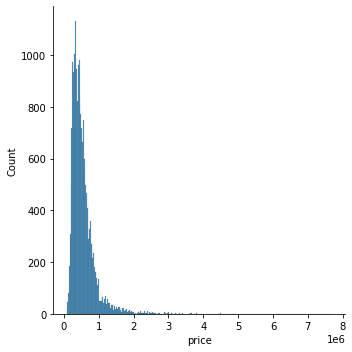

In [6]:
sns.displot(data['price'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f6bf9f3be10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6bf9edfed0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6bf9e9d390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6bf9ef8990>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6bf9d32850>,
  <matplotlib.lines.Line2D at 0x7f6bf9f459d0>]}

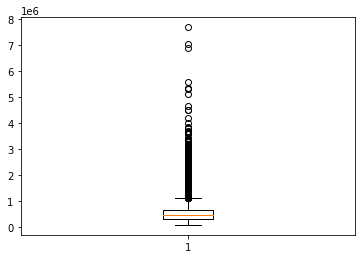

In [7]:
plt.boxplot(data['price'])

##### Displaying the distribution and boxplot for the log of the price attribute

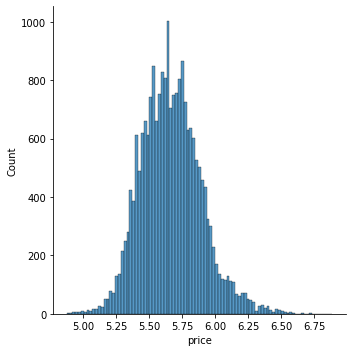

In [8]:
## Displaying the log(price)
sns.displot(np.log10(data['price']))


{'boxes': [<matplotlib.lines.Line2D at 0x7f6bf95fd390>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6bf9605410>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6bf960b450>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6bf9605ed0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6bf95fd950>,
  <matplotlib.lines.Line2D at 0x7f6bf95fde90>]}

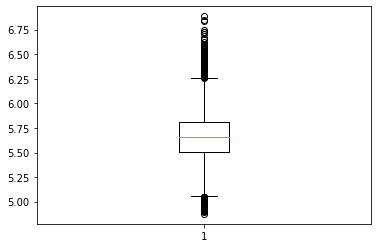

In [9]:
plt.boxplot(np.log10(data['price']))

## Displaying the correlation heatmap

In [10]:
data.corr().style.background_gradient(cmap='coolwarm')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


The Correlation Heatmap between the features of the dataset indicates correlation between the price attribute and the following :

**sqft_living**
It represents the total sum of the living area above the ground and the basement and it is only logical that the higher the area the higher the price.

**sqft_above**
The area above ground is related to the living area as well as the price.

**bathrooms**
The number of bathrooms seems to correlate with the price.

**Grade**
The higher the grade of the building implies that the quality and standard of construction is high and hence a a higher price.

## Date

This variable represents the date of selling the house. In this case we will focus only on the year as it plays an important role in 
the price of the property. 
We will extract the year from this variable and store it in another variable called 'year_purchased'

In [11]:
date = data['date']
for i in range(len(data)):
    data.loc[i, 'year_purchased'] = data['date'][i][:4]


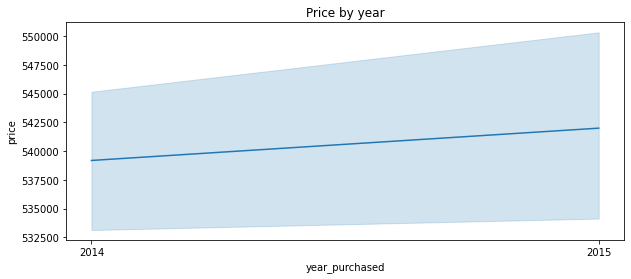

In [12]:
plt.figure(figsize=(10,4))
plt.title("Price by year")
sns.lineplot(data=data, x='year_purchased', y='price', palette='Set1')

The above plot confirms the fact that the house prices are correlated to the year of purchase which is evident by the increase in prices from 2014 to 2015

## Bathrooms

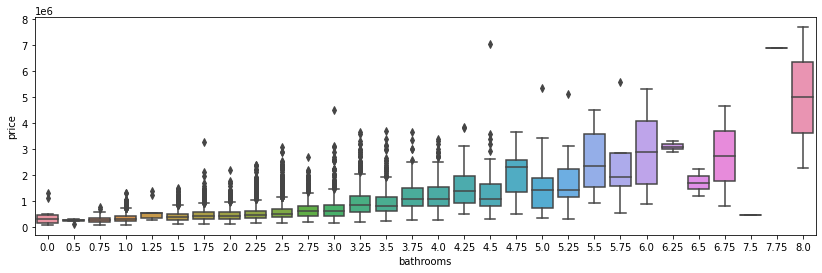

In [13]:
plt.figure(figsize=(14,4))
sns.boxplot(x='bathrooms',y='price',data=data)

In [14]:
data['bathrooms'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


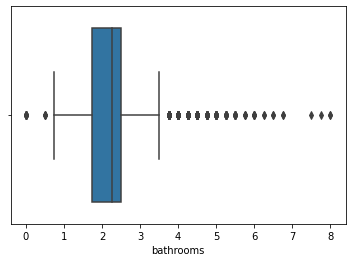

In [15]:
sns.boxplot(data['bathrooms'])

From the above we see that there are a number of 0 or missing values and in addition to that we also have numbers below one which doesnt make sense so we delete all the instances which have the number of bathrooms as less than 1. We shall keep the outliers presents as they have valuable information about the large houses and luxury houses.
The correlation heat map suggests that this variable seems to be highly correlated to bedrooms, floors, sqft_living, grade, sqft_above and sqft_above15 and so to tackle this problem we will do some feature engineering in the later stages.

In [16]:
data.drop(data[data['bathrooms'] < 1].index, axis = 0, inplace = True)

## Bedrooms

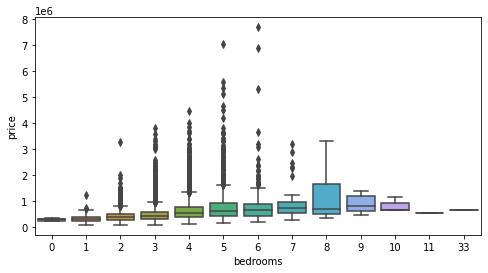

In [17]:
plt.figure(figsize=(8,4))
sns.boxplot(x='bedrooms',y='price',data=data)

In [18]:
data['bedrooms'].value_counts()

3     9808
4     6879
2     2732
5     1601
6      272
1      168
7       38
8       13
9        6
0        5
10       3
11       1
33       1
Name: bedrooms, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


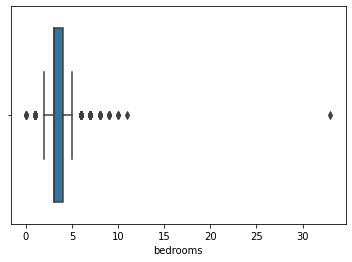

In [19]:
sns.boxplot(data['bedrooms'])

The bedrooms also seem to have some anomalous data which is 33, 11 and a few other outliers.
To solve this problem we will delete the instances which are greater than 10.
Here we make the assumption that zero values represent studio apartments and so we will not delete these.

In [20]:
data.drop(data[data['bedrooms'] >= 11].index, axis = 0, inplace = True)

## Floors

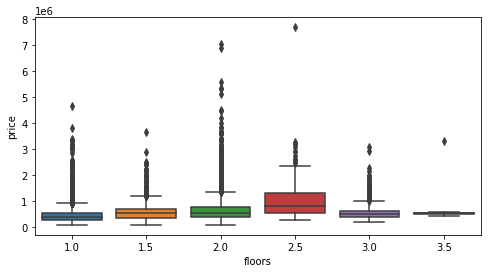

In [21]:
plt.figure(figsize=(8,4))
sns.boxplot(x='floors',y='price',data=data)

Floors variable doesnt seem to have much effect on the way houses are priced as is shown in the boxplots. The price range for houses with one room is almost the same as that with two rooms. We will create a new variable usiing floors, bedrooms and bathrooms in an attempt tp reduce the multicolinearity of the bedrooms and bathrooms

In [22]:
# Combining bathrooms and bedrooms
data['bath/floor'] = data['bathrooms'] / data['floors']
data['bedrooms/bath'] = data['bedrooms']/data['bathrooms']
data.drop(data[data['bedrooms/bath'] == np.inf].index, axis = 0, inplace = True)
data.drop(data[data['bath/floor'] == np.inf].index, axis = 0, inplace = True)

## Grade

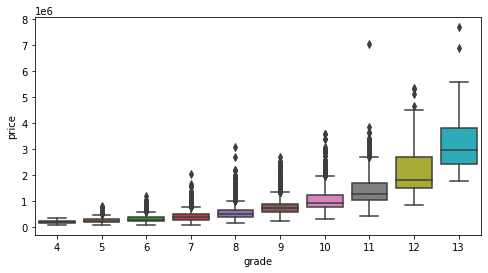

In [23]:
plt.figure(figsize=(8,4))
sns.boxplot(x='grade', y='price', data=data)

The grade of the building seems to have an impact on the cost of a house which is shown by the increasing level of the median for each category. But at the same time it is also highly correlated to the sqft_above variable (77%) we will try to modify this a bit in an attempt to reduce its multicolinearity.
In the modified attribute:

*1* : Bad quality

*2* : Below average

*3* : Good 

*4* : Best

In [24]:
for i in range(13):
  if i == 13:
    break
  if i+1 <= 3: 
    data.loc[data['grade'] == i+1, 'grade'] = 0

  if i+1 <= 7 and i+1 > 3: 
    data.loc[data['grade'] == i+1, 'grade'] = 1

  if i+1 <= 11 and i+1 > 7: 
    data.loc[data['grade'] == i+1, 'grade'] = 2

  if i+1 <= 13 and i+1 > 11: 
    data.loc[data['grade'] == i+1, 'grade'] = 3
data['grade'].head()

0    1
1    1
2    1
3    1
4    2
Name: grade, dtype: int64

Here we modified the values such that the 0 represents bad construction, 1 is below average , 2 is above average and 3 stands for best quality of construction and design

## Year renovated
It is common knowlege that a newly renovated house would cost more that a house that was renovated years back and so we convert this attribute into an ordinal form with values ranging from 0 to 7 depending on which year it was renovated.

In [25]:
data.loc[data['yr_renovated'] < 2015, 'new_renovated'] = 7
data.loc[data['yr_renovated'] < 2005, 'new_renovated'] = 6
data.loc[data['yr_renovated'] < 1995, 'new_renovated'] = 5
data.loc[data['yr_renovated'] < 1985, 'new_renovated'] = 4
data.loc[data['yr_renovated'] < 1975, 'new_renovated'] = 3
data.loc[data['yr_renovated'] < 1965, 'new_renovated'] = 2
data.loc[data['yr_renovated'] < 1955, 'new_renovated'] = 1
data.loc[data['yr_renovated'] < 1945, 'new_renovated'] = 0

### Waterfront and view
* Houses with a waterfront tend to have a higher value compared to those that dont indicated by the higher price median in the boxplot
* Houses with an increasing quality of the view tend to cost more.


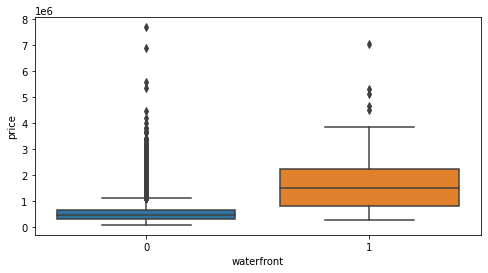

In [26]:
plt.figure(figsize=(8,4))
sns.boxplot(x='waterfront', y='price', data=data)

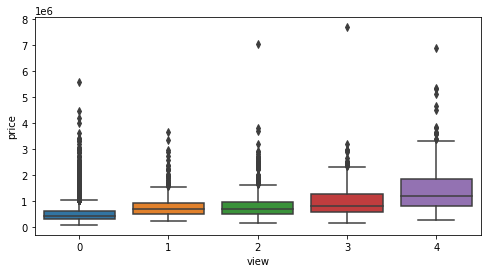

In [27]:
plt.figure(figsize=(8,4))
sns.boxplot(x='view', y='price', data=data)

## Latitude and longitude

In [28]:
# map - latitude and longtitude
from IPython.display import Image
Image(url = "https://areaimages.s3.amazonaws.com/king_county__washington__search_area.png")

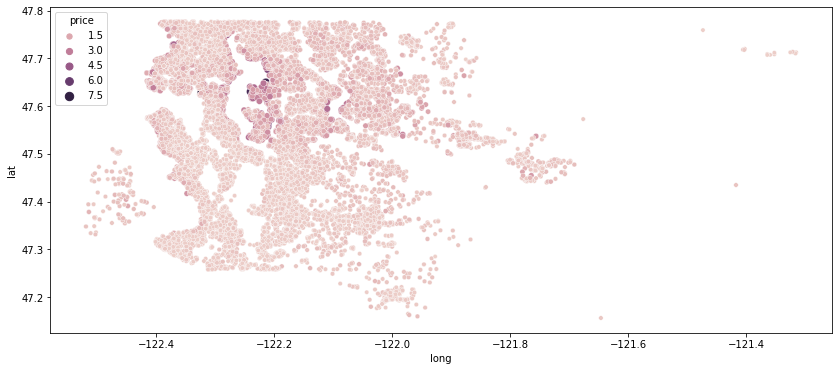

In [29]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='long',y='lat',data=data, hue='price', size='price')

From the map and the spatial plot we see that the prices of the houses tend to be much higher in the Bellevue and Redmond region of Seattle which is overlooking the water body as compared to the ones that are located further away.
This region is most likey the main city center indicated by the dense network of roads and the grey color indicating the presence of a large number of buildings as opposed to the interior and greener part of the map where there seems to be more vegetation.

Since the distance from Seattle seems to play an important role in judging the price of a house we introduce a new variable called distance_from_seattle into the training data.

In [30]:
from geopy import distance
lat_long = data['lat'].astype(str) + ',' + data['long'].astype(str)
lat_long = list(map(eval, lat_long))
Seattle = (47.6062, -122.3321)
miles = []
for i in lat_long:
    miles.append(round(distance.distance(i, Seattle).miles, 1))
data['distance_from_seattle'] = miles

## Dropping variables with low correlation to the price
we also drop sqft_living as it is just the sum of sqft_above and sqft_basement

In [31]:
data.drop([ 'sqft_living15','id','condition', 'sqft_lot', 'sqft_lot15', 'bathrooms', 'yr_built', 'floors', 'sqft_living', 'date', 'bedrooms'], axis = 1, inplace = True)

In [32]:
data.corr().style.background_gradient(cmap = 'coolwarm')

,price,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,bath/floor,bedrooms/bath,new_renovated,distance_from_seattle
price,1.000000,0.272510,0.398747,0.492027,0.604737,0.323151,0.126992,-0.052903,0.307082,0.022431,0.238989,-0.253557,0.134685,-0.286518
waterfront,0.272510,1.000000,0.398230,0.063290,0.077208,0.082751,0.092899,0.030170,-0.011540,-0.037300,0.037866,-0.057467,0.077518,-0.015125
view,0.398747,0.398230,1.000000,0.199709,0.169432,0.278088,0.103235,0.085050,0.006531,-0.077557,0.158822,-0.111318,0.093142,-0.076650
grade,0.492027,0.063290,0.199709,1.000000,0.594812,0.116271,0.018608,-0.159359,0.089068,0.174448,0.151651,-0.404676,0.029997,0.013143
sqft_above,0.604737,0.077208,0.169432,0.594812,1.000000,-0.054156,0.023435,-0.261722,-0.001496,0.347271,0.113649,-0.321968,0.027199,0.192504
sqft_basement,0.323151,0.082751,0.278088,0.116271,-0.054156,1.000000,0.070952,0.075212,0.110393,-0.145082,0.563489,-0.078523,0.075647,-0.202238
yr_renovated,0.126992,0.092899,0.103235,0.018608,0.023435,0.070952,1.000000,0.065057,0.029770,-0.070077,0.039115,-0.037833,0.965871,-0.083035
zipcode,-0.052903,0.030170,0.085050,-0.159359,-0.261722,0.075212,0.065057,1.000000,0.267815,-0.564446,-0.147300,0.127707,0.059458,-0.519916
lat,0.307082,-0.011540,0.006531,0.089068,-0.001496,0.110393,0.029770,0.267815,1.000000,-0.136995,-0.003999,-0.024814,0.028257,-0.596364
long,0.022431,-0.037300,-0.077557,0.174448,0.347271,-0.145082,-0.070077,-0.564446,-0.136995,1.000000,0.080801,-0.159373,-0.065350,0.661654


From the above heatmap we see that the now variable new_renovated has improved its contribution to the price prediction compared tp the yr_renovated.
The multicolinearity among bedrooms, bathrooms, floors and grade have been reduced by introducing the new variables.

## Zipcode

As we have seen before location is an important factor influencing the price of a house and so Zipcode is a useful variable in that sense.
It is a categorical variable which will have to be modified into one hot vectors using pandas dummies.

In [33]:
data = data.reset_index(drop = True)
zipcode = pd.get_dummies(data['zipcode'], drop_first=True) 

In [34]:
data.columns

Index(['price', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement',
       'yr_renovated', 'zipcode', 'lat', 'long', 'year_purchased',
       'bath/floor', 'bedrooms/bath', 'new_renovated',
       'distance_from_seattle'],
      dtype='object')

In [35]:
housing_num_cols = [ 'distance_from_seattle','view', 'sqft_above', 'lat', 'long','bath/floor', 'grade','year_purchased','new_renovated', 'sqft_basement', 'bedrooms/bath']
housing_cat_cols = ['waterfront']

## Scaling the data

In [36]:
X_num = data[housing_num_cols]
y = data['price']

# Scaling the data
scaler = StandardScaler()
X_num_norm = scaler.fit_transform(X_num)

# Combining all the data frames
housing_data_final = pd.concat([pd.DataFrame(X_num_norm).reset_index(drop=True),
                                zipcode.reset_index(drop=True), 
                                data[housing_cat_cols].reset_index(drop=True),
                                y.reset_index(drop = True)], axis = 1,
              verify_integrity = True)
housing_data_final.shape

(21525, 82)

There seems to have been some null values that have creeped in during the concatenation as pandas merges dataframes only on the common indices and so we will drop these null values.

In [37]:
np.count_nonzero(housing_data_final.isnull())

16

In [38]:
housing_data_final.dropna(inplace = True)
np.count_nonzero(housing_data_final.isnull())

0

## Shuffling and splitting the data

In [39]:
# Dividing the data into the predictors and labels
housing_data_final['log_price'] = np.log10(housing_data_final['price'])
X1 = housing_data_final.drop(['price', 'log_price'], axis = 1)
y1 = housing_data_final['log_price']

# Fixing the datatype to float32 as tensorflow gives errors with other datatypes
y1 = np.asarray(y1.to_numpy()).astype('float32')
X1 = np.asarray(X1.to_numpy()).astype('float32')

# Splitting the data in training and test sets in the ratio of 80% to 20% and shuffling it
X_train, X_test, y_train, y_test = train_test_split(X1, 
                                                    y1, 
                                                    test_size = 0.2, 
                                                    random_state = 42,
                                                    shuffle = True,
                                                    )

# Dividing the training data again to obtain the vaidation data for using thcall backs
X_train_final, X_valid, y_train_final, y_valid = train_test_split(X_train,
                                                                  y_train,
                                                                  test_size = 0.2,
                                                                  random_state = 42)

In [40]:
X_train.shape

(17207, 81)

In [41]:
y_train.shape

(17207,)

## Building the model

For developing the model we implemented the function below having default parameters which we think might be an fair estimate of a moderately good model to start with. As we go further we will be tuning all the parameters one-by-one using Randomized search Cross validation. 
To build this neural network we will be using batch normalization which normalizes the inputs before sending them into the next layer. This tends to speed up training by avoiding the vanishing gradients problem. In addition to this we also use the He_normal initialization strategy for ReLU activation functions and its variants and the default Glorot initialization for sigmoid and tanh functions, LeCun intitialisation for selu instead of random as random initialization tends to bring in instability at the early stages of training resulting in longer training times and causing the network to get stuch in local optima. 

In [42]:
def build_model(n_hidden = 1, n_neurons=80, learning_rate = 0.01, input_shape = [81], activation_func = 'relu', loss_func = 'mae', optimizer = 'Adam'):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape = input_shape))
  
  for layer in range(n_hidden):

    # We add a batch normalization layer for all layers with activations function other than
    # selu as selu is self normalizing
    if activation_func != 'selu':
      
      # Setting the initializer strategy as he_normal in case of relu and its variants
      if (activation_func in [ tf.keras.layers.PReLU(), tf.keras.layers.LeakyReLU(), 'relu', 'elu']):
        init = 'he_normal'
      
      # Glorot uniforn in case of tanh and sigmoid
      else:
        init = tf.keras.initializers.GlorotUniform()
      
      # Adding a batch normalization layer
      model.add(keras.layers.BatchNormalization())
    
    else:
      # LeCun initializer works well with selu activation function
      init = tf.keras.initializers.LecunUniform()

    model.add(keras.layers.Dense(n_neurons, activation = activation_func, kernel_initializer= init))  
  # Adding the output neuron
  model.add(keras.layers.Dense(1))
  
  # Compiling the model
  optimizer = optimizer
  model.compile(loss = loss_func, optimizer = optimizer)
  return model

We will be making use of the KerasRegressor object which is a thin wrapper around the keras model built using the build_model function which will enable us to use sklearns RandomizedSearchCV to find our hyperparameters.

We use a batch size of 32 and a default value of 15 for epochs to see which parameters perform best on hte first 15 epochs in order to save time and resources in long training times for a large number of epochs.

In [43]:
# Using the sklearn wrapper for cross validation
reg_model = keras.wrappers.scikit_learn.KerasRegressor(build_model, batch_size = 32, epochs = 15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


## Hyperparameter tuning using Randomized search
The hyper-parameters were tuned using sklearn’s RandomizedSearchCV. The hunt for the best values was done by inputting the model and a dictionary of possible values in the RandomizedSearchcv object such that while searching for one hyper-parameter the others were kept fixed enabling us to get a good understanding of how the model’s performance changes based on the parameter alone. Among the list of values for the hyper-parameter being tuned the n_iter value was set to 4 which means out of the given list of possible values, 4 will be sampled at random. Based on these 4 values the models were tested using 3-fold cross-validation with negative mean absolute error as the scoring function.
The average training and validation score is then plotted to give an indication of which hyperparameter is best suited.

In [44]:
# Function for plotting the results of the random search
def plot_random_search(cv_results, parameter_name, display_name):
    # Get the mean train and test scores
    y_1 = cv_results['mean_test_score']
    y_2 = cv_results['mean_train_score']

    # Plot random search scores
    x = []
    for i in range(len(results.cv_results_['params'])):
        x.append(str(results.cv_results_['params'][i][parameter_name]))
    plt.title('Mean score per parameter')
    plt.ylabel('Mean score')
    plt.plot(x, y_1, linestyle='--', marker='o', label='Validation')
    plt.plot(x, y_2, linestyle='-', marker='^',label='Train' )
    plt.xlabel(display_name)
    plt.legend()
    plt.show()

#### Activation functions

The best value is:  {'activation_func': 'sigmoid'}


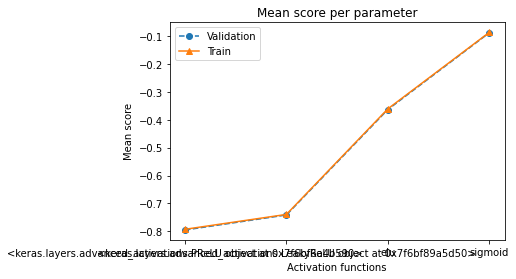

In [45]:
param_distribs = {
    'activation_func': [ tf.keras.layers.PReLU(), tf.keras.layers.LeakyReLU(),'sigmoid', 'tanh', 'relu', 'elu', 'selu']
}

random_search = RandomizedSearchCV(reg_model, 
                                   param_distribs, 
                                   cv = 3, 
                                   scoring = 'neg_mean_absolute_error',
                                   error_score = 'raise', 
                                   n_iter = 4,
                                   return_train_score = True,
                                   random_state = 42)

results = random_search.fit(X_train_final, y_train_final, verbose = 0)

# Printing the best parameter
print('The best value is: ', random_search.best_params_)

plot_random_search(results.cv_results_, 'activation_func', 'Activation functions')

The sigmoid function is normally not very popular due to the fact that in the long run it saturates to 0 or 1 which happens due to the fact that the mean value of the sigmoid function is 0.5 and not 0 which tends to push the input further and further as we go deeper in the layer causing it to saturate.
In this condition no learning can take place or even if it does it will happen very slowly as the derivative in the saturated region is zero. 
We alleviate this problem making sure that the variance of the outputs of each layer should be equal to the variance of its inputs.
This is done by using the glorot initialization at the beginning of the training and by the batch normalization layer we used in the build function. This special layer performs normalization on the outputs of one layer before feeding it to the next layer thereby restricting the variance and eliminating the 'dead neuron' effect.

#### Hidden layers

The best value is:  {'n_hidden': 9, 'activation_func': 'sigmoid'}


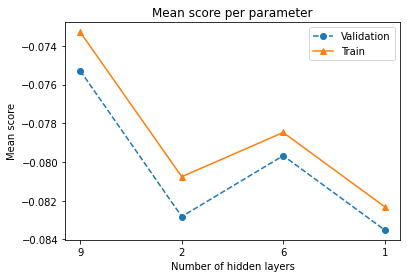

In [ ]:
param_distribs = {
    'activation_func' : ['sigmoid'],
    'n_hidden': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

random_search = RandomizedSearchCV(reg_model, 
                                   param_distribs, 
                                   cv = 3, 
                                   scoring = 'neg_mean_absolute_error',
                                   error_score = 'raise', 
                                   n_iter = 4,
                                   return_train_score = True,
                                   random_state = 42)

results = random_search.fit(X_train_final, y_train_final, verbose = 0)

# Printing the best parameter
print('The best value is: ', random_search.best_params_)

plot_random_search(results.cv_results_, 'n_hidden', 'Number of hidden layers')

The higher the number of hidden layers in the network enable the model to detect more patterns and hence learn better which is why among the chosen values for the number of layers 9 was selected as it helped the model learn more important information which was not possible with a shallower network.
But at the same time a very deep network may cause overfitting and also increase the computational time and resources.
We select 9 because it has the highest validation and training score.

#### Number of neurons per layer

The best value is:  {'n_neurons': 125, 'n_hidden': 9, 'activation_func': 'sigmoid'}


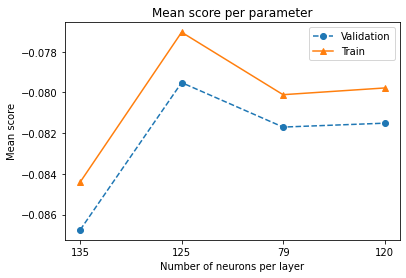

In [ ]:
param_distribs = {
    'activation_func' : ['sigmoid'],
    'n_hidden': [9],
    'n_neurons': [79, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140]

}

random_search = RandomizedSearchCV(reg_model, 
                                   param_distribs, 
                                   cv = 3, 
                                   scoring = 'neg_mean_absolute_error',
                                   error_score = 'raise', 
                                   n_iter = 4,
                                   return_train_score = True,
                                   random_state = 42)

results = random_search.fit(X_train_final, y_train_final, verbose = 0)

# Printing the best parameter
print('The best value is: ', random_search.best_params_)
plot_random_search(results.cv_results_, 'n_neurons', 'Number of neurons per layer')

Similar to the number of layers, the number of nodes in a layer are also important. Too many could overfit the data by detecting unnecessary patterns among the variables itself while too few tend to result in a high bias due to underfitting. In this case we choose 125 as it has the highest training and validation score compared to the others.

## Optimizer

The best value is:  {'optimizer': 'Adam', 'n_neurons': 125, 'n_hidden': 9, 'activation_func': 'sigmoid'}


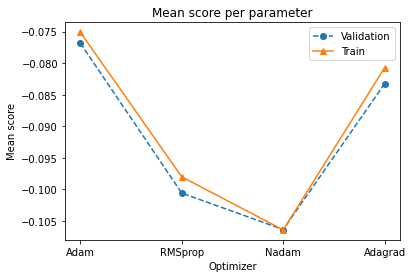

In [ ]:
param_distribs = {
    'n_hidden' : [9],
    'n_neurons': [125],
    'activation_func': ['sigmoid'],
    'optimizer': ['Adam','RMSprop', 'Adagrad', 'Adadelta', 'Adamax', 'Nadam']
}

random_search = RandomizedSearchCV(reg_model, 
                                   param_distribs, 
                                   cv = 3, 
                                   scoring = 'neg_mean_absolute_error',
                                   error_score = 'raise', 
                                   n_iter = 4,
                                   return_train_score = True,
                                   random_state = 42)

results = random_search.fit(X_train_final, y_train_final, verbose = 0)

# Printing the best parameter
print('The best value is: ', random_search.best_params_)

plot_random_search(results.cv_results_, 'optimizer', 'Optimizer')

Adam is the best optimizer for this task as is indicated by its high training and validation score. It has the advantage of using the idea of momentum and also keeps track of an exponentially decaying average of past gradients which helps in quick optimization.
Adam tends to combine the benefits of RMSprop and AdaGrad and can handle sparse data well. Since our data is also sparse owing to the large number of one hot vectors its not doubt that Adam has the best performance.

## Loss function

The best value is:  {'optimizer': 'Adam', 'n_neurons': 125, 'n_hidden': 9, 'loss_func': 'huber_loss', 'activation_func': 'sigmoid'}


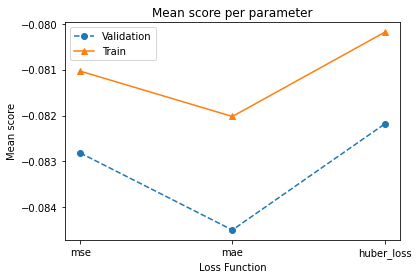

In [ ]:
param_distribs = {
    'n_hidden' : [9],
    'n_neurons': [125],
    'activation_func': ['sigmoid'],
    'optimizer': ['Adam'],
    'loss_func' : ['mse','mae', 'huber_loss']

}

random_search = RandomizedSearchCV(reg_model, 
                                   param_distribs, 
                                   cv = 3, 
                                   scoring = 'neg_mean_absolute_error',
                                   error_score = 'raise', 
                                   n_iter = 3,
                                   return_train_score = True,
                                   random_state = 42)

results = random_search.fit(X_train_final, y_train_final, verbose = 0)

# Printing the best parameter
print('The best value is: ', random_search.best_params_)

plot_random_search(results.cv_results_, 'loss_func', 'Loss Function')

The mean squared error is a good loss function where outliers are very important as the even if the model makes a single wrong prediction it will shoot up the loss as it is squared.

Mean absolute error on the other hand gives equal weightage to the regular values as well as outliers by taking the absolute difference and averaging it which ignores the effect fo the outliers.

As we discussed before our dataset has a few important outliers indicated by the luxury houses sold at high premium prices while most of the other houses are regular houses so we would like to give some importance to the outliers but not too much importance.

In this case the huber loss is the best function as it takes the advantages of both the MSE and MAE by introducing a loss threshold value above which MAE is used otherwise MSE is used.

## Batch size

The best value is:  {'optimizer': 'Adam', 'n_neurons': 125, 'n_hidden': 9, 'loss_func': 'huber_loss', 'batch_size': 50, 'activation_func': 'sigmoid'}


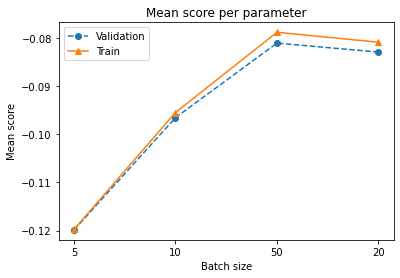

In [ ]:
param_distribs = {
    'n_hidden' : [9],
    'n_neurons': [125],
    'activation_func': ['sigmoid'],
    'optimizer': ['Adam'],
    'loss_func' : ['huber_loss'],
    'batch_size': [5, 10, 20, 32, 40, 50, 60]


}

random_search = RandomizedSearchCV(reg_model, 
                                   param_distribs, 
                                   cv = 3, 
                                   scoring = 'neg_mean_absolute_error',
                                   error_score = 'raise', 
                                   n_iter = 4,
                                   return_train_score = True,
                                   random_state = 42)

results = random_search.fit(X_train_final, y_train_final, verbose = 0)

# Printing the best parameter
print('The best value is: ', random_search.best_params_)

plot_random_search(results.cv_results_, 'batch_size', 'Batch size')

Larger batch sizes have the benefit of taking advantage ofhardware accelerators like GPUs as long as it can fit in the memory. This implies the model can see more training instances per second. But very large batch sizes could induce instabilities in the beginning of training. In the plot 50 has the highest training and validation score owing to the fact that the code was run in the Google Collaboratory environment which makes use of Tesla GPUs. Generally, the best default value for this is 32 but since our Random search didn't select it among the candidates we will stick to 50

## Initial Learning rate


In this section we will be using Random search to  see which learning rate helps train the model fastest in the first few epochs of training.
We will not be using a constant learning rate as this might cause the model to train very slowly if its small or cause it oscillate and never converge to the global minimum.

To avoid this we will be using a learning rate scheduler while training the final model. This helps take advantage of the high initial learning rate at the beginning and progressively drop the its value as progresses resulting in a fine tuned search for the minumum.

The best value is:  {'optimizer': 'Adam', 'n_neurons': 125, 'n_hidden': 9, 'loss_func': 'huber_loss', 'learning_rate': 0.0001, 'batch_size': 20, 'activation_func': 'sigmoid'}


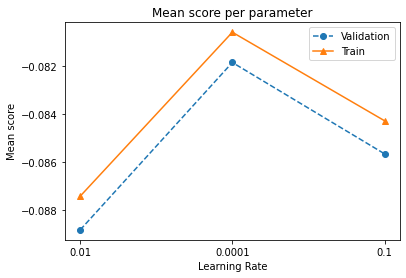

In [ ]:
param_distribs = {
    'n_hidden' : [9],
    'n_neurons': [125],
    'activation_func': ['sigmoid'],
    'optimizer': ['Adam'],
    'loss_func' : ['huber_loss'],
    'batch_size': [50],
    'learning_rate' : [0.1, 0.01, 0.001, 0.0001]


}

random_search = RandomizedSearchCV(reg_model, 
                                   param_distribs, 
                                   cv = 3, 
                                   scoring = 'neg_mean_absolute_error',
                                   error_score = 'raise', 
                                   n_iter = 3,
                                   return_train_score = True,
                                   random_state = 42)

results = random_search.fit(X_train_final, y_train_final, verbose = 0)

# Printing the best parameter
print('The best value is: ', random_search.best_params_)

plot_random_search(results.cv_results_, 'learning_rate', 'Learning Rate')

The best value is 0.0001

## Epochs

For tuning the epochs we will be using the Early stopping callback while training the final model based on the above tuned hyperparameters.
We will choose a sufficiently high number of epochs and start trainning the model with the early stopping callback with patience = 10 indicating that if the validation loss doesnt improve for 10 successive epochs the training will stop. This will help us save time and resources that would be lost in using grid search or Randomised search for training a large number of epochs.

### Final model based on hyperparameter tuning
Here specify the weight initializer, as the Glorot initializer as it works well with the sigmoid activation function.

In [141]:
def final_model(n_hidden = 1, n_neurons=80, learning_rate = 0.01, input_shape = [81], activation_func = 'relu', loss_func = 'mae', optimizer = tf.keras.optimizers.Adam()):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape = input_shape))
  
  for layer in range(n_hidden):
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(n_neurons, 
                                 activation = activation_func,
                                 kernel_initializer = tf.keras.initializers.GlorotNormal(seed=42))                                 )  
  # Adding the output neuron
  model.add(keras.layers.Dense(1))
  
  # Compiling the model
  optimizer = optimizer
  optimizer.learning_rate = learning_rate
  model.compile(loss = loss_func, optimizer = optimizer)
  
  return model

## Developing the final model based on the hyper parameter tuninig

Keras helps you specify a list of objects to be called at the start and end of training with the help of callbacks.
 
We will get the best results out of the epochs parameter by using the Early stopping callback which stops training when the performace of the model does not improve for certain number of iteration. In our case we will fix this value at 10.

As mentioned before we will also be using a learning rate scheduler with the help of callbacks. The one we will be using is such that whenever the perfomance of a model plateaus (does not improve for 5 successive iterations) it reduces the learning rate by a predetermined factor (0.5).

In [160]:
# Defining and compiling the model
neural_network = final_model(n_hidden = 9,
                            n_neurons = 125,
                            activation_func = 'sigmoid',
                            optimizer = tf.keras.optimizers.Adam(),
                            loss_func = 'huber_loss',
                            learning_rate = 0.0001)

# Callbacks for better epoch tuning and implementing learning rate scheduling
early_stop = tf.keras.callbacks.EarlyStopping(patience = 10, 
                                              restore_best_weights = True,
                                              monitor = 'val_loss')

# lr scheduling
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience = 5)



# Fitting the model
history = neural_network.fit(X_train_final, y_train_final, epochs = 150, batch_size = 50,
                             validation_data = (X_valid, y_valid),
                             callbacks = [
                                          early_stop, 
                                          lr_scheduler
                                          
                                          ]
                             )

Epoch 1/150
276/276 [==============================] - 7s 15ms/step - loss: 3.2370 - val_loss: 2.7204 - lr: 1.0000e-04
Epoch 2/150
276/276 [==============================] - 4s 15ms/step - loss: 0.4139 - val_loss: 0.0190 - lr: 1.0000e-04
Epoch 3/150
276/276 [==============================] - 4s 14ms/step - loss: 0.0465 - val_loss: 0.0238 - lr: 1.0000e-04
Epoch 4/150
276/276 [==============================] - 4s 14ms/step - loss: 0.0323 - val_loss: 0.0216 - lr: 1.0000e-04
Epoch 5/150
276/276 [==============================] - 4s 14ms/step - loss: 0.0256 - val_loss: 0.0253 - lr: 1.0000e-04
Epoch 6/150
276/276 [==============================] - 4s 15ms/step - loss: 0.0203 - val_loss: 0.0164 - lr: 1.0000e-04
Epoch 7/150
276/276 [==============================] - 4s 14ms/step - loss: 0.0196 - val_loss: 0.0132 - lr: 1.0000e-04
Epoch 8/150
276/276 [==============================] - 4s 14ms/step - loss: 0.0169 - val_loss: 0.0105 - lr: 1.0000e-04
Epoch 9/150
276/276 [===========================

## Training and validation loss curves

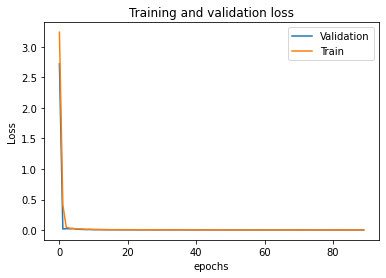

In [161]:
# Plotting the training and testing losses
plt.plot(history.history['val_loss'], linestyle='-', label='Validation')
plt.plot(history.history['loss'], linestyle='-',label='Train' )
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

The final model was trained for about 90 epochs and was stopped by the early stopping callback as validation performance did not seem to improve much after this.

The total training loss is 0.0038 and the validation loss is 0.0035.

The above plot indicate the the training and validation loss decreased together throughout the training and there are no signs of any underfitting or overfitting. This would be otherwise indicated by diverging training and validation loss curves in case of overfitting or a high training and validation loss at the end the epochs.

## Model Evaluation

Now lets see how well our model performs on previosly unseen data.

In [162]:
# Predictions using the trained model
neural_network.evaluate(X_test, y_test)

135/135 [==============================] - 1s 4ms/step - loss: 0.0036


0.003629079321399331

The model seems to perform quite well as it has a very small loss value of 0.0036

## But what does this mean in terms of the real world?

If we recall our target varible which is the price was converted to the log 10 scale to deal with the problem of the luxury houses.

So now we use our model to see how accurately our model would predict the value of a house and what would be the actual difference in the price predicted and the actual price of the house.

In [170]:
prediction = neural_network.predict(X_test)

In [171]:
prediction.shape

(4302, 1)

These are still in the log 10 form converting them back to the normal form

In [172]:
prediction = 10 ** prediction

In [173]:
prediction = np.squeeze(prediction)
print('Predicted prices:\n ', prediction)

Predicted prices:
  [402586.62 223593.98 612110.   ... 512328.44 542312.5  521919.7 ]


Similarly doing the same for the actual prices

In [174]:
actual_prices = 10 ** y_test

In [175]:
print('Actual prices:\n ', actual_prices)

Actual prices:
  [309999.94 229999.94 515000.03 ... 515000.03 535000.25 478000.22]


Calculating the average difference in the predicted and actual prices

In [176]:
average_difference = np.sum(np.abs(np.subtract(actual_prices, prediction))) / len(prediction)

print('The average difference between the prices predicted and the actual is: ', average_difference)

The average difference between the prices predicted and the actual is:  78985.47652254766


So our models predicted prices seem to charge clients $78985.47  more than they actually cost.
This shows that ours models performance is not very good as it would overcharge future customers resulting in a loss of business.
The best option in this case would be to get more data or to get more features while collecting the data which would have a higher influence on the price.